<a href="https://colab.research.google.com/github/MinJunJA/dacon/blob/master/%EA%B0%90%EA%B7%A4%EC%B0%A9%EA%B3%BC%EB%9F%89_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder   
from sklearn.decomposition import PCA

In [3]:
train = pd.read_csv('/content/drive/MyDrive/ggg/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ggg/test.csv')

In [4]:
train['새순1'] = train.iloc[:, 6:11].mean(axis=1)
train['새순2'] = train.iloc[:, 11:16].mean(axis=1)
train['새순3'] = train.iloc[:, 16:21].mean(axis=1)
train['새순4'] = train.iloc[:, 21:26].mean(axis=1)
train['새순5'] = train.iloc[:, 26:31].mean(axis=1)
train['새순6'] = train.iloc[:, 31:36].mean(axis=1)
train['새순7'] = train.iloc[:, 36:41].mean(axis=1)
train['새순8'] = train.iloc[:, 41:46].mean(axis=1)
train['새순9'] = train.iloc[:, 46:51].mean(axis=1)
train['새순10'] = train.iloc[:, 51:56].mean(axis=1)
train['새순11'] = train.iloc[:, 56:61].mean(axis=1)
train['새순12'] = train.iloc[:, 61:66].mean(axis=1)
train['새순13'] = train.iloc[:, 66:71].mean(axis=1)
train['새순14'] = train.iloc[:, 71:76].mean(axis=1)
train['새순15'] = train.iloc[:, 76:81].mean(axis=1)
train['새순16'] = train.iloc[:, 81:86].mean(axis=1)
train['새순17'] = train.iloc[:, 86:91].mean(axis=1)
train['새순18'] = train.iloc[:, 91:95].mean(axis=1)
train = train.drop(train.columns[6:95], axis=1)

In [5]:
train['엽록소1'] = train.iloc[:, 6:11].mean(axis=1)
train['엽록소2'] = train.iloc[:, 11:16].mean(axis=1)
train['엽록소3'] = train.iloc[:, 16:21].mean(axis=1)
train['엽록소4'] = train.iloc[:, 21:26].mean(axis=1)
train['엽록소5'] = train.iloc[:, 26:31].mean(axis=1)
train['엽록소6'] = train.iloc[:, 31:36].mean(axis=1)
train['엽록소7'] = train.iloc[:, 36:41].mean(axis=1)
train['엽록소8'] = train.iloc[:, 41:46].mean(axis=1)
train['엽록소9'] = train.iloc[:, 46:51].mean(axis=1)
train['엽록소10'] = train.iloc[:, 51:56].mean(axis=1)
train['엽록소11'] = train.iloc[:, 56:61].mean(axis=1)
train['엽록소12'] = train.iloc[:, 61:66].mean(axis=1)
train['엽록소13'] = train.iloc[:, 66:71].mean(axis=1)
train['엽록소14'] = train.iloc[:, 71:76].mean(axis=1)
train['엽록소15'] = train.iloc[:, 76:81].mean(axis=1)
train['엽록소16'] = train.iloc[:, 81:86].mean(axis=1)
train['엽록소17'] = train.iloc[:, 86:91].mean(axis=1)
train['엽록소18'] = train.iloc[:, 91:95].mean(axis=1)
train = train.drop(train.columns[6:95], axis=1)
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순1,새순2,새순3,새순4,...,엽록소9,엽록소10,엽록소11,엽록소12,엽록소13,엽록소14,엽록소15,엽록소16,엽록소17,엽록소18
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.74,2.62,2.48,2.36,...,74.421652,73.800845,73.300475,72.981747,72.455088,72.072320,71.561218,71.054385,70.581899,70.192336
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.26,3.06,2.92,2.76,...,74.751240,74.164677,73.650808,73.424797,73.109873,72.655852,72.042626,71.602423,71.096162,70.537685
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,2.92,2.78,2.64,2.52,...,74.927285,74.449649,74.032300,73.634263,73.205652,72.721754,72.035522,71.494388,71.033418,70.530970
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.02,2.86,2.72,2.56,...,73.905289,73.151168,72.623141,72.157215,71.603909,71.146025,70.638339,70.092745,69.783789,69.277413
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.60,3.42,3.24,3.06,...,72.123303,71.685749,71.185331,70.491783,69.836836,69.286081,68.756803,68.425281,68.120946,67.597837


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
x = train.drop(['ID', '착과량(int)', '수관폭1(min)', '수관폭2(max)'],axis = 1).values
y = train['착과량(int)'].values

x = StandardScaler().fit_transform(x)
features = ['수고(m)', '수관폭평균', '새순1','새순2','새순3','새순4','새순5','새순6','새순7','새순8','새순9','새순10','새순11','새순12','새순13','새순14','새순15','새순16','새순17','새순18',
            '엽록소1','엽록소2','엽록소3','엽록소4','엽록소5','엽록소6','엽록소7','엽록소8','엽록소9','엽록소10','엽록소11','엽록소12','엽록소13','엽록소14','엽록소15','엽록소16','엽록소17','엽록소18']


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=38)
pca_array = pca.fit_transform(x)
pca_df = pd.DataFrame(pca_array, columns = [f"pca{num+1}" for num in range(x.shape[1])])

pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38
0,1.197439,5.534776,0.638769,-0.079573,1.170732,-0.129616,0.222674,0.262144,-0.146662,0.100638,...,-0.010399,-0.002930,-0.011355,0.029658,-0.003880,-0.015391,0.012384,-0.014402,-0.010428,0.017847
1,2.193568,3.097361,5.250563,-0.792338,1.407828,0.799421,-0.181335,-0.332148,0.203223,-0.052755,...,-0.008697,0.011604,0.028023,-0.030351,-0.024938,-0.021132,-0.000417,0.007826,0.009800,0.002791
2,1.850079,4.750750,1.626316,-2.035149,0.248757,-0.247295,0.064157,0.101477,0.102617,0.030417,...,-0.023762,-0.009651,0.002712,-0.012625,0.008187,-0.015007,-0.007539,0.003761,0.000300,0.003718
3,0.800935,3.400631,-1.598947,-1.226159,0.461357,0.198171,-0.139894,-0.224564,0.339537,0.206955,...,0.003907,-0.004310,0.013915,0.017429,0.019600,-0.022569,0.012922,0.002901,-0.010758,-0.005660
4,-0.676963,0.262878,-1.192538,-1.397017,0.997529,-0.232031,-0.127454,-0.182851,0.229158,-0.019737,...,-0.012272,-0.010647,0.005032,-0.015395,0.032427,-0.002033,0.003260,0.003035,-0.000843,-0.000688


In [9]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)' : pca.explained_variance_, '기여율':pca.explained_variance_ratio_},
                      index = np.array([f"pca{num+1}" for num in range(x.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,17.984426,0.473060,0.473060
pca2,15.428343,0.405825,0.878885
pca3,2.357985,0.062024,0.940909
pca4,1.489972,0.039192,0.980101
pca5,0.507922,0.013360,0.993461
pca6,0.092422,0.002431,0.995892
pca7,0.041418,0.001089,0.996982
pca8,0.033146,0.000872,0.997854
pca9,0.028808,0.000758,0.998612
pca10,0.013519,0.000356,0.998967


In [10]:
# 각 주성분(PC)들이 기존 변수들과 어떤 관련성이 있는지 확인

x_train = pd.DataFrame(x, index = train.index, columns=features).head()
loadings = pca.components_
num_pca = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pca+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x_train.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
variable,,,,,,,,,,,,,,,,,,,,,
수고(m),0.005275,0.001049,-0.037214,-0.706020,0.707119,-0.004099,0.000214,-0.006162,0.002766,0.001981,...,-0.000456,-0.000402,0.000260,0.000526,-0.000289,-0.000045,0.000069,-0.000174,-0.000153,-0.000414
수관폭평균,-0.001267,0.007043,-0.000035,-0.707659,-0.706477,0.000451,-0.002404,0.005481,-0.002053,0.000299,...,0.000700,0.000224,0.000102,-0.000234,0.000011,-0.000103,-0.000204,-0.000163,-0.000098,-0.000150
새순1,0.022524,-0.252230,0.055607,-0.002287,0.000282,-0.084581,-0.048652,0.048429,-0.126365,0.143941,...,-0.246594,-0.098440,0.525610,0.043131,0.041806,-0.021825,-0.004839,-0.003443,-0.023531,0.011699
새순2,0.022628,-0.252339,0.052326,-0.002456,0.000605,-0.085808,-0.048582,0.049858,-0.126644,0.149154,...,-0.025518,-0.048685,-0.805306,-0.011412,-0.005561,0.036591,-0.018803,-0.001783,0.027537,-0.023564
새순3,0.022769,-0.252436,0.049162,-0.002007,0.001015,-0.084630,-0.052762,0.049083,-0.124638,0.149529,...,0.689767,0.275169,0.226549,-0.064334,-0.015492,-0.022285,0.043145,-0.000404,-0.000239,0.024486
새순4,0.022852,-0.252571,0.044599,-0.002047,-0.000072,-0.083064,-0.052840,0.054386,-0.128855,0.135794,...,-0.550745,-0.110452,0.090775,0.005656,-0.026382,-0.004218,-0.020664,-0.005152,-0.012002,-0.011424
새순5,0.022942,-0.252707,0.039456,-0.001195,-0.000796,-0.081791,-0.054544,0.055511,-0.120770,0.133176,...,0.125325,0.014743,-0.008570,0.040125,0.016647,0.015364,0.017428,0.004691,0.025264,0.002179
새순6,0.023163,-0.252803,0.034485,-0.001494,-0.001440,-0.081763,-0.051811,0.052359,-0.117159,0.099996,...,-0.010590,-0.055988,-0.029379,-0.012264,-0.014487,-0.010277,-0.016299,0.012725,-0.003754,-0.009638
새순7,0.023422,-0.252912,0.027236,-0.001162,-0.000954,-0.077444,-0.049289,0.043769,-0.111140,0.080094,...,-0.001802,0.018404,-0.015879,-0.011195,-0.000466,0.000706,-0.003817,-0.016767,-0.004909,-0.006550


In [11]:
# PCA 진행
pca = PCA()   
pca.fit(x)
PC_score = pca.transform(x)
pca.explained_variance_

array([1.79844258e+01, 1.54283432e+01, 2.35798505e+00, 1.48997222e+00,
       5.07921631e-01, 9.24216164e-02, 4.14181641e-02, 3.31456164e-02,
       2.88080414e-02, 1.35190873e-02, 8.06523319e-03, 7.13617860e-03,
       4.33708634e-03, 3.61380112e-03, 2.83894303e-03, 1.93576958e-03,
       1.88550363e-03, 1.32559470e-03, 1.20411009e-03, 9.90598693e-04,
       8.46711371e-04, 7.43497187e-04, 5.67839129e-04, 5.48211317e-04,
       4.45747974e-04, 4.27581820e-04, 3.69378298e-04, 3.12507468e-04,
       2.81363383e-04, 2.59171941e-04, 2.29112035e-04, 1.89047857e-04,
       1.63421811e-04, 1.37803952e-04, 1.20827241e-04, 1.04999526e-04,
       9.56272941e-05, 8.96519898e-05])

In [12]:
ratio = pca.explained_variance_ratio_
ratio

array([4.73059921e-01, 4.05825067e-01, 6.20241219e-02, 3.91920291e-02,
       1.33603024e-02, 2.43104579e-03, 1.08945783e-03, 8.71857843e-04,
       7.57762852e-04, 3.55604256e-04, 2.12146811e-04, 1.87709083e-04,
       1.14082137e-04, 9.50569393e-05, 7.46751761e-05, 5.09182231e-05,
       4.95960343e-05, 3.48682651e-05, 3.16727502e-05, 2.60565750e-05,
       2.22717822e-05, 1.95568501e-05, 1.49363642e-05, 1.44200768e-05,
       1.17248948e-05, 1.12470548e-05, 9.71607714e-06, 8.22015447e-06,
       7.40094464e-06, 6.81722392e-06, 6.02653220e-06, 4.97268943e-06,
       4.29862536e-06, 3.62477665e-06, 3.17822351e-06, 2.76189343e-06,
       2.51536750e-06, 2.35819390e-06])

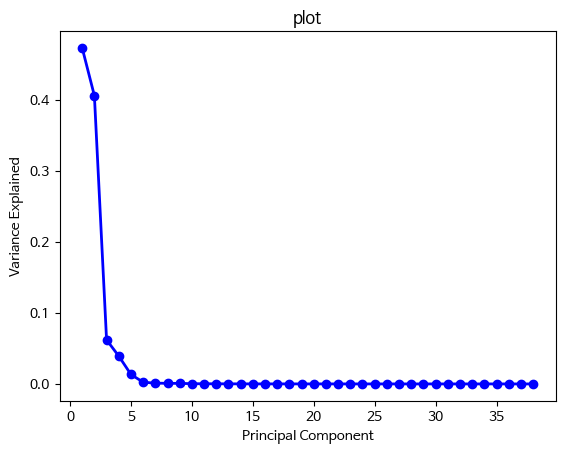

In [17]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


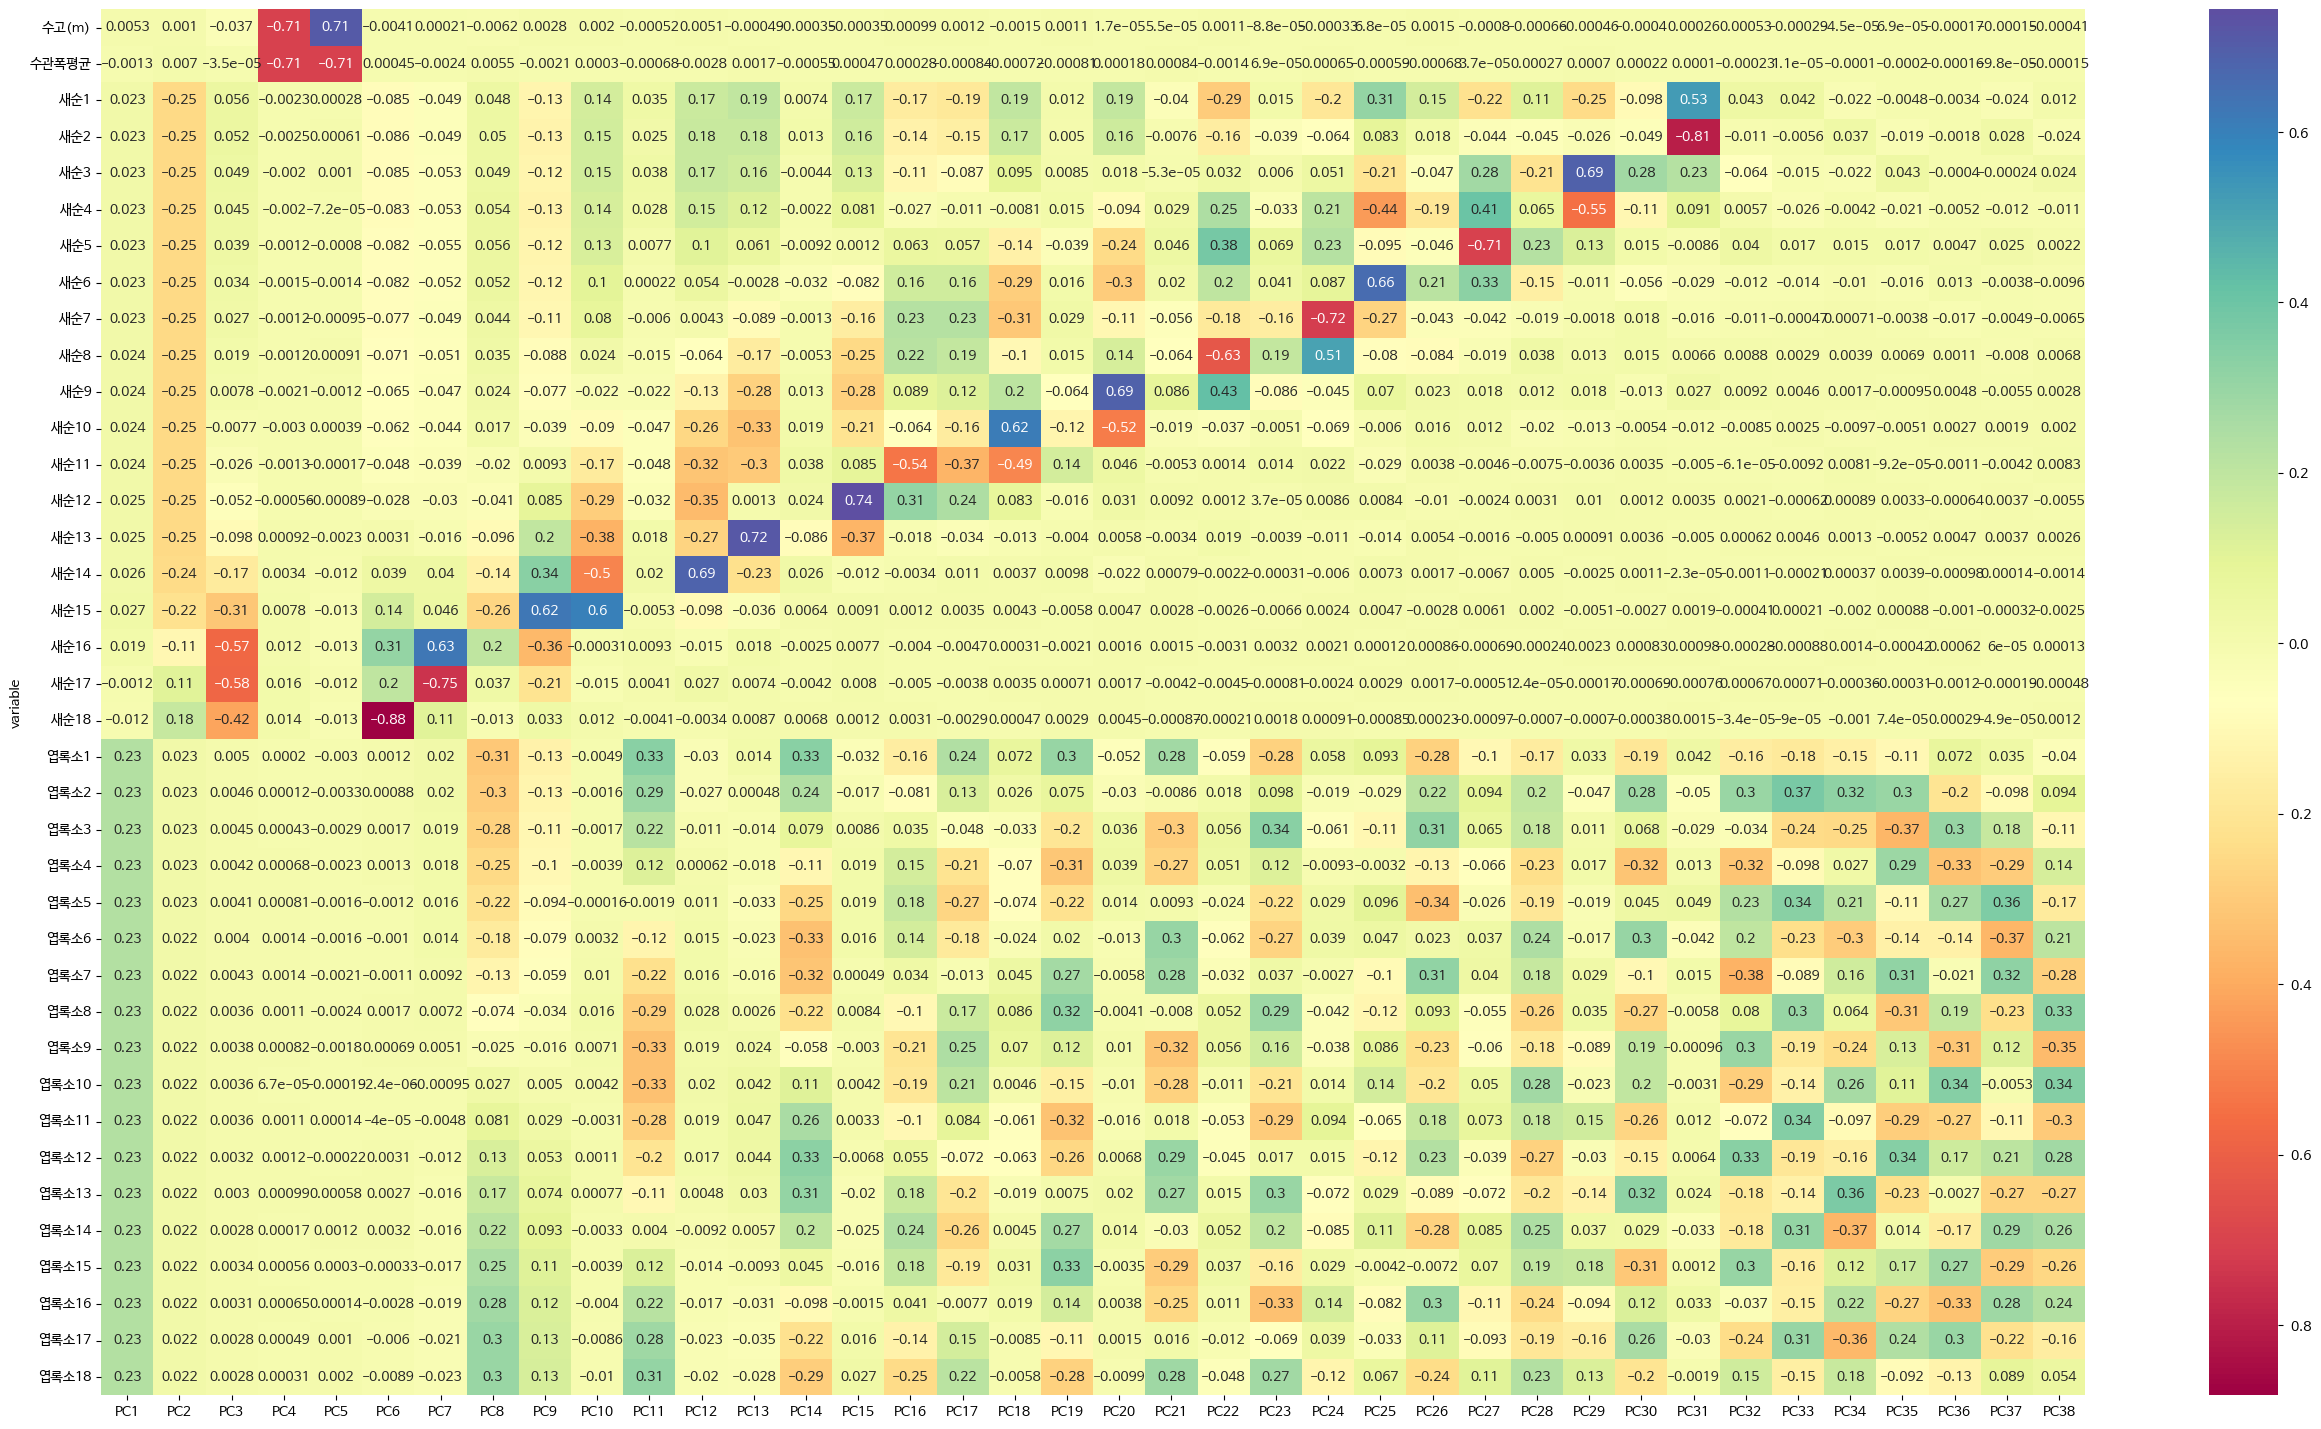

In [18]:
plt.subplots(figsize=(32, 18))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [16]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 